# Mounting Google drive

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


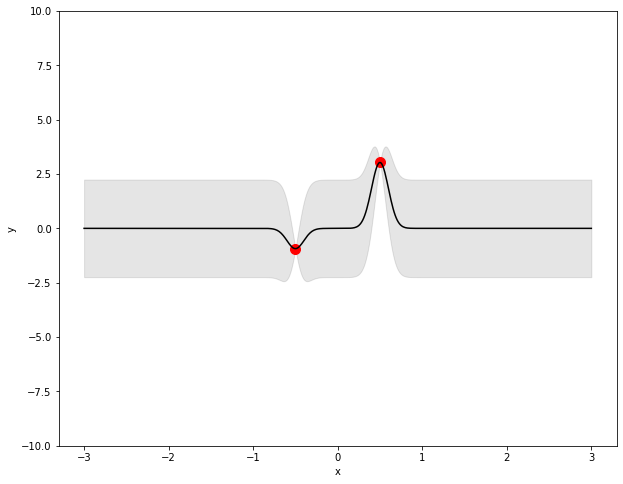

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt

def plot_gpr_samples(x,gpr_model,x_train,y_train):
    fig, ax = plt.subplots(figsize=(10, 8))
    y_mean, y_std = gpr_model.predict(x, return_std=True)
    x = x.reshape(-1)
    y_mean = y_mean.reshape(-1)
    
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.scatter(x_train,y_train,c='r',s=100)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-10, 10])

def black_box_function(x):
    x = np.array(x)
    return -0.1*x ** 3 + 0.2*x**2 +  1 + 2*np.sin(x*3)

def addpoint(gpr,x_train,x_test):
    y_mean, y_std = gpr.predict(x_test, return_std=True)
    x_new = x_test[np.argmax(y_std)]
    x_train = np.concatenate((x_train,[x_new]))
    y_train = black_box_function(x_train)
    gpr.fit(x_train,y_train)
    plot_gpr_samples(x_test,gpr,x_train,y_train)
    return x_train
    
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
x_test = np.linspace(-3,3,500).reshape(-1,1)

x_train = np.array([[-0.5],[0.5]])
y_train = black_box_function(x_train)
gpr.fit(x_train,y_train)
plot_gpr_samples(x_test,gpr,x_train,y_train)



## Exploration

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


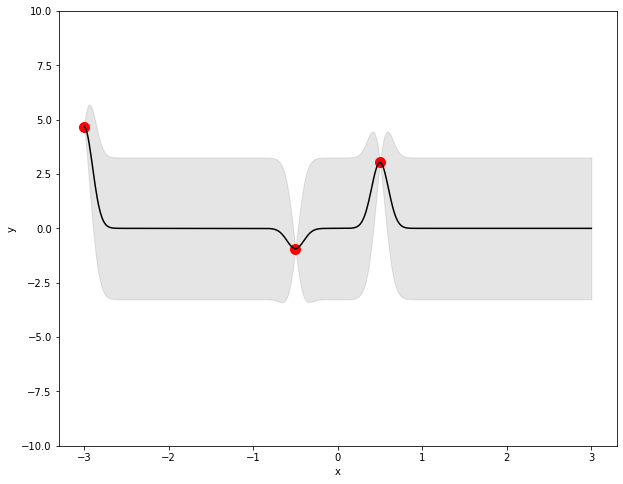

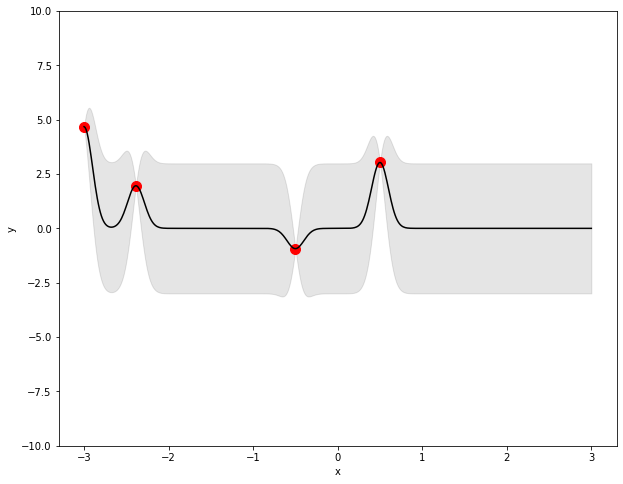

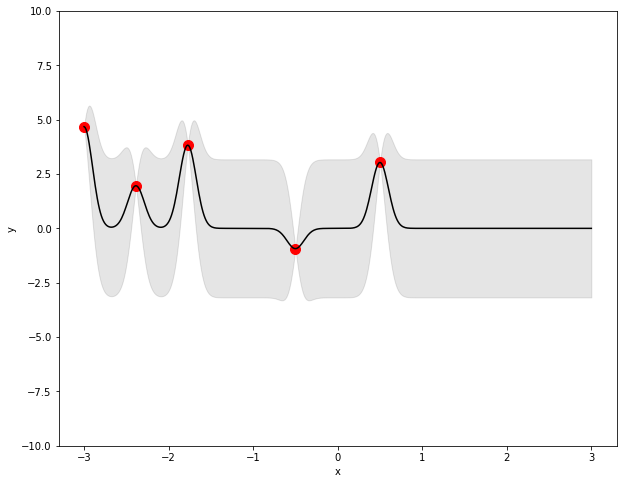

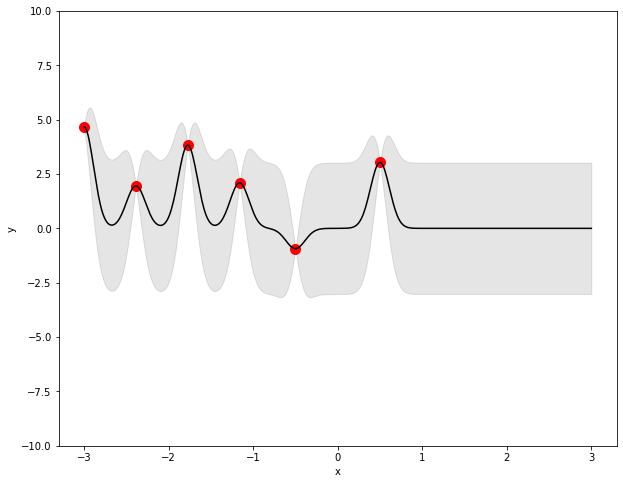

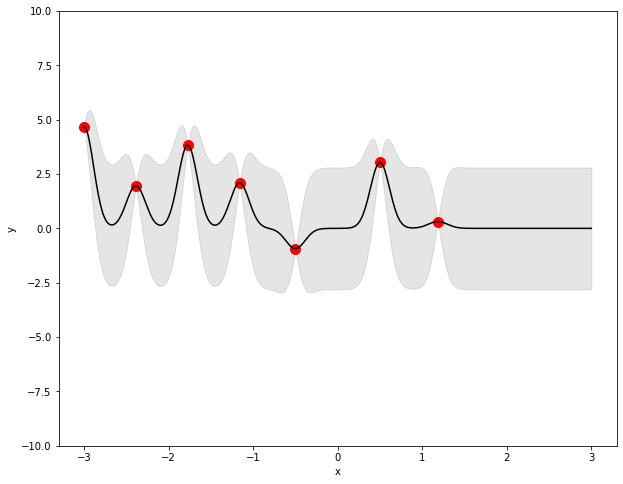

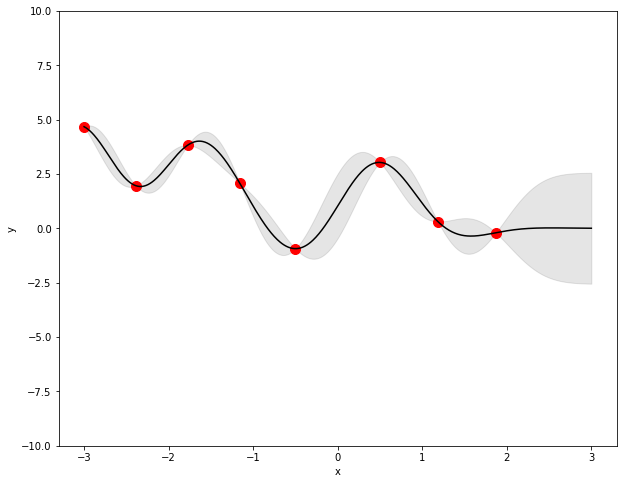

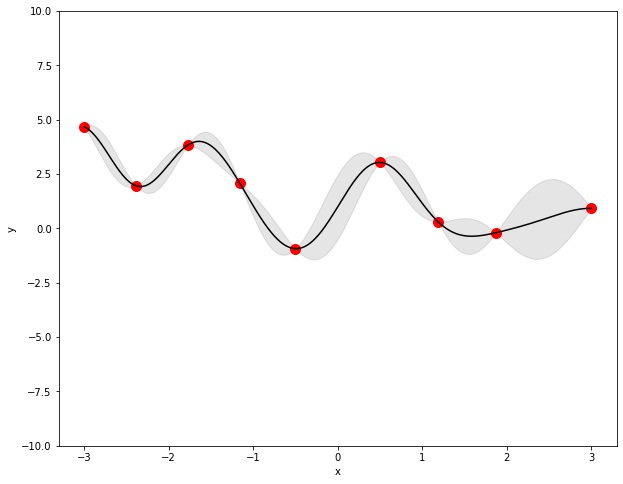

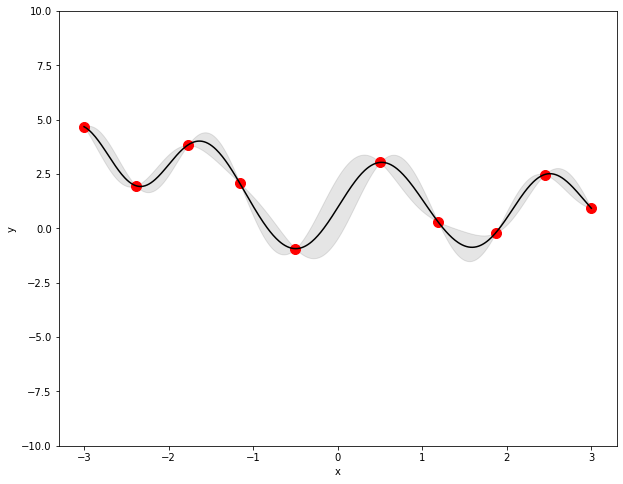

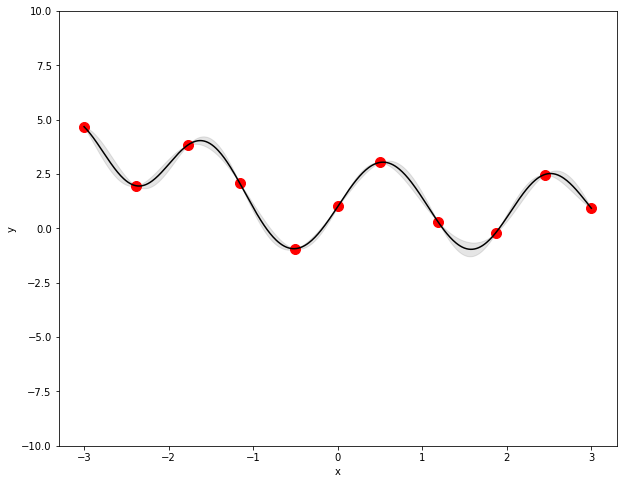

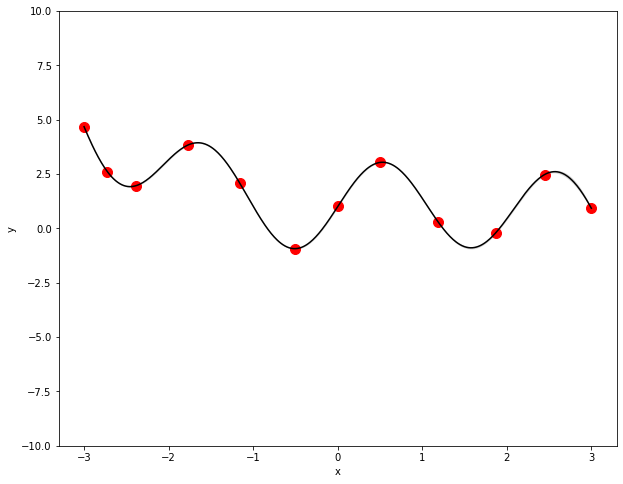

In [2]:
for _ in range(10):
    x_train = addpoint(gpr,x_train,x_test)

## Exploitation

In [ ]:
x_train = np.array([[-0.5],[0.5]])
y_train = black_box_function(x_train)
gpr.fit(x_train,y_train)
plot_gpr_samples(x_test,gpr,x_train,y_train)

def addpoint(gpr,x_train,x_test):
    y_mean, y_std = gpr.predict(x_test, return_std=True)
    x_new = x_test[np.argmax(y_mean.reshape(-1)+y_std*2)]
    x_train = np.concatenate((x_train,[x_new]))
    y_train = black_box_function(x_train)
    gpr.fit(x_train,y_train)
    plot_gpr_samples(x_test,gpr,x_train,y_train)
    return x_train

for _ in range(10):
    x_train = addpoint(gpr,x_train,x_test)